In [20]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from utils.Lyapunov import ContinuousDS, LCE, mLCE

In [11]:
# 常量参数
ξ = 0.175 
a = 0.7 
b = 0.8
c = 0.1
ω = 1
A = 0.85

In [12]:
x0 = np.array([0, 0])
t0 = 0.
dt = 1e-2
T_init = int(1e5)
T_cal = int(1e6)

In [13]:
# 模型表达式
def f(x, t):
        res = np.zeros_like(x)
        res[0] = x[0]*(1-ξ) - np.power(x[0],3)/3 - x[1] + A*np.cos(ω*t)
        res[1] = c*(x[0]+a-b*x[1])
        return res

# 雅可比矩阵
def jac(x, t):
    res = np.zeros((x.shape[0], x.shape[0]))
    res[0, 0], res[0, 1] = (1-ξ)-x[0]*x[0], -1
    res[1, 0], res[1, 1] = c, -c*b
    return res

In [14]:
Lorenz63 = ContinuousDS(x0, f, jac, dt)
LCE1 = LCE(Lorenz63, T_init, T_cal)

In [15]:
print(LCE1)

[ 0.03708479 -0.41995636]


# 关于振幅的李指数分岔图

In [16]:
# 常量参数
ξ = 0.175 
a = 0.7 
b = 0.8
c = 0.1
ω = 1
A = 0.85

x0 = np.array([0, 0])
t0 = 0.
dt = 1e-2
T_init = int(1e5)
T_cal = int(1e6)

In [17]:
plt_LCE =[]
A_list = np.arange(0, 1.6, 0.05)
for A in A_list:     
        # 模型表达式
        def f(x, t):
                res = np.zeros_like(x)
                res[0] = x[0]*(1-ξ) - np.power(x[0],3)/3 - x[1] + A*np.cos(ω*t)
                res[1] = c*(x[0]+a-b*x[1])
                return res

        # 雅可比矩阵
        def jac(x, t):
                res = np.zeros((x.shape[0], x.shape[0]))
                res[0, 0], res[0, 1] = (1-ξ)-x[0]*x[0], -1
                res[1, 0], res[1, 1] = c, -c*b
                return res
        
        Lorenz63 = ContinuousDS(x0, f, jac, dt)
        LCE1 = LCE(Lorenz63, T_init, T_cal)
        plt_LCE.append(LCE1)

In [18]:
# print(plt_LCE)

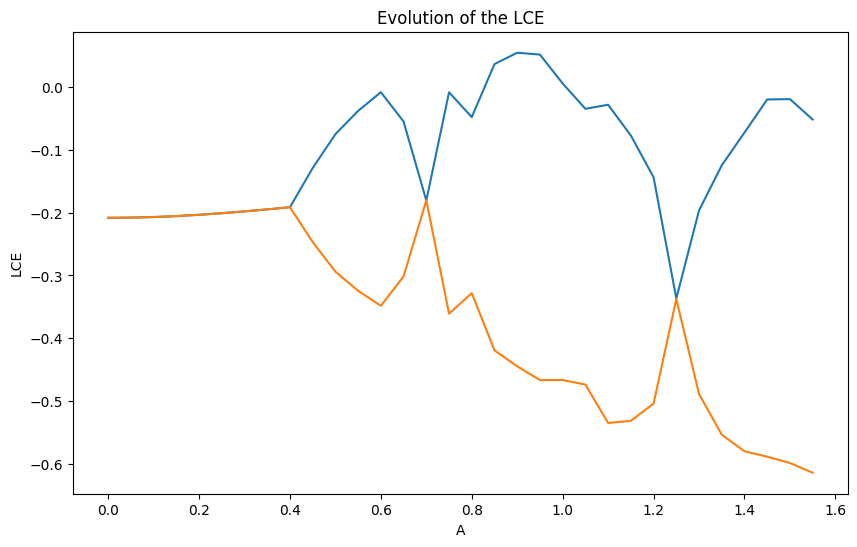

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(A_list[:len(plt_LCE)], plt_LCE)
plt.xlabel("A")
plt.ylabel("LCE")
plt.title("Evolution of the LCE")
plt.show()

# 关于振幅的最大李指数分岔图

In [31]:
plt_mLCE =[]
A_list = np.arange(0, 1.6, 0.05)
for A in A_list:     
        # 模型表达式
        def f(x, t):
                res = np.zeros_like(x)
                res[0] = x[0]*(1-ξ) - np.power(x[0],3)/3 - x[1] + A*np.cos(ω*t)
                res[1] = c*(x[0]+a-b*x[1])
                return res

        # 雅可比矩阵
        def jac(x, t):
                res = np.zeros((x.shape[0], x.shape[0]))
                res[0, 0], res[0, 1] = (1-ξ)-x[0]*x[0], -1
                res[1, 0], res[1, 1] = c, -c*b
                return res
        
        Lorenz63 = ContinuousDS(x0, f, jac, dt)
        mLCE1 = mLCE(Lorenz63, T_init, T_cal)
        plt_mLCE.append(mLCE1)

In [32]:
print(plt_mLCE)

[-0.2079576093928949, -0.20772332551026798, -0.20674513881696444, -0.20521089571198478, -0.203168005855483, -0.2006527139069827, -0.1977916198937485, -0.1945332302148877, -0.19104729304839382, -0.12865780793866066, -0.07461035188724625, -0.03758588122891799, -0.00771843925317191, -0.05454561312124731, -0.18008998910026153, -0.007762963174743472, -0.04745106345985339, 0.03706773358476736, 0.05519537766870445, 0.05223057577586204, 0.006154180391015619, -0.03411445468624568, -0.027701107651657345, -0.07673450202276419, -0.14326536968337047, -0.33675369081341944, -0.1961252902671834, -0.12437143483200003, -0.07206270422000564, -0.019314893140937657, -0.018749973977314833, -0.051287163297576946]


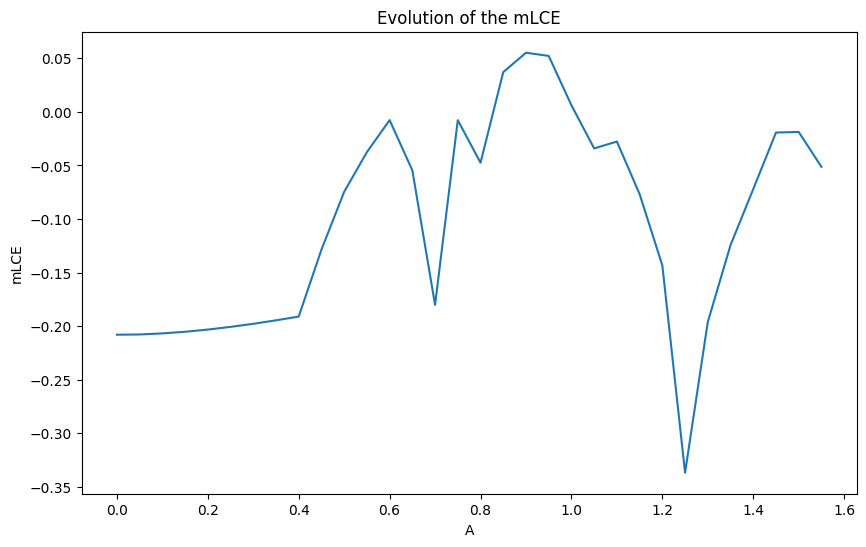

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(A_list[:len(plt_mLCE)], plt_mLCE)
plt.xlabel("A")
plt.ylabel("mLCE")
plt.title("Evolution of the mLCE")
plt.show()